#  Weather Data Analysis

<b>Introduction</b>

Weather data plays a crucial role in our daily lives and various industries, from agriculture to transportation and emergency preparedness. Understanding and effectively utilizing weather data can help individuals and organizations make informed decisions, improve safety, and optimize operations.

<b>Objective</b>

The primary objective of this exploratory data analysis (EDA) is to uncover patterns, trends, and relationships within the weather data. By employing statistical and visual analysis techniques, we aim to extract meaningful insights that contribute to a deeper understanding of the atmospheric conditions during the observed period.

<b>Types of Weather Data</b>

Weather data encompasses a wide range of information collected from various sources, including meteorological stations, satellites, weather balloons, and weather radars. The key types of weather data include:

a. Temperature: Information about the current and forecasted temperature, which impacts clothing choices, heating and cooling needs, and agricultural practices.

b. Precipitation: Data on rainfall, snowfall, and other forms of precipitation, critical for water resource management, flood forecasting, and agricultural planning.

c. Humidity: Measures the amount of moisture in the air, influencing human comfort, crop health, and weather patterns.

d. Wind Speed and Direction: Wind data is vital for aviation, renewable energy generation, and understanding weather patterns.

e. Atmospheric Pressure: Information about the pressure exerted by the atmosphere, useful for weather predictions and altimeter settings for aviation.

f. Cloud Cover: Indicates the fraction of the sky covered by clouds and helps determine potential rainfall and solar radiation.

g. UV Index: Measures the strength of ultraviolet radiation from the sun, important for skin protection and outdoor activities.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('E:\Weather Data.CSV')

In [3]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [4]:
wdata=data.copy()

In [5]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
wdata.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [7]:
wdata.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# Exploratory Data Analysis

In [8]:
wdata['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [9]:
#finding All Unique Wind Speed Values

wdata['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

In [10]:
#No.of Times When Weather is Claer

wdata[wdata['Weather']=='Clear']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [11]:
#No.of Times When Wind Speed Was Exaclty 4km/h

wdata[wdata['Wind Speed_km/h']== 4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


In [12]:
wdata.rename(columns={'Weather' : 'weather condition', 'Rel Hum_%': 'Humidity'}, inplace=True)
wdata

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,weather condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [13]:
#All weather conditions counts

wdata['weather condition'].value_counts()

weather condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

In [14]:
#showing All Records when weather condition is Fog
wdata[wdata['weather condition'] == 'Fog']

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,weather condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,12/29/2012 4:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,12/29/2012 5:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,12/29/2012 6:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,12/29/2012 7:00,-14.8,-16.4,88,7,8.0,101.22,Fog


In [15]:
#All Instance When Wind Speed is 25 & Visibility 24

wdata[(wdata['Wind Speed_km/h']>24) & (wdata['Visibility_km']==25)]

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,weather condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


In [16]:
#Wether is Clear and 'humidity' is Greater than 50 or visibility is above 40
selected_data = wdata[(wdata['weather condition'] == 'Clear') & ((wdata['Humidity'] > 50) | (wdata['Visibility_km'] > 40))]
selected_data

,Date/Time,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,weather condition
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
241,1/11/2012 1:00,-10.7,-17.8,56,17,25.0,101.49,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


# Data Visualization

In [23]:
import plotly.express as px
plt.figure(figsize=(3, 5))
weather_counts = wdata['weather condition'].value_counts()
fig = px.sunburst(
data_frame=weather_counts.reset_index(),
path=['weather condition'],
values=wdata['weather condition'].value_counts(),
color='weather condition',
color_continuous_scale='rocket',
title='All Occurence of Weather Categories')
fig.show()

<Figure size 300x500 with 0 Axes>

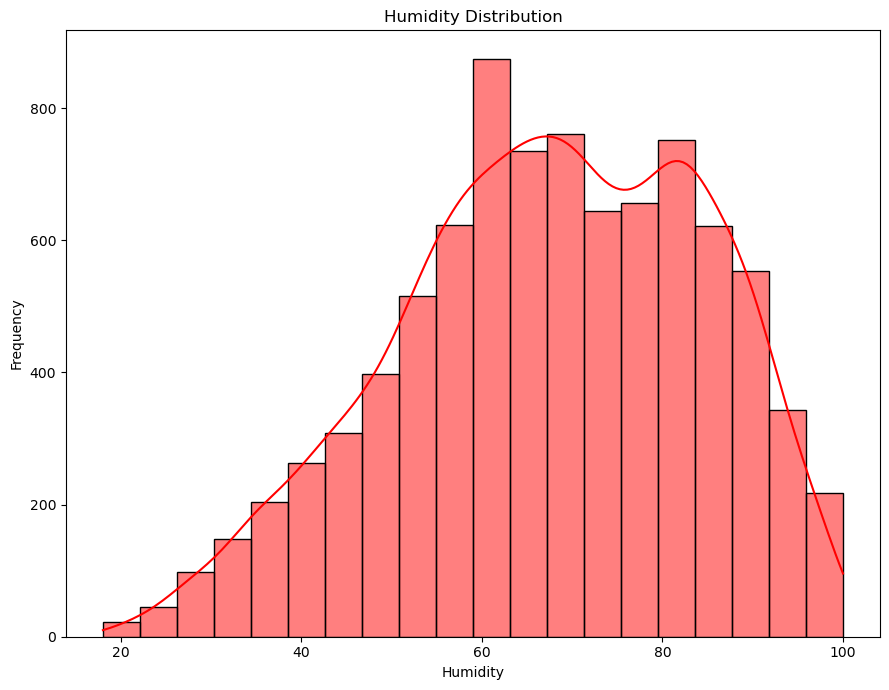

In [76]:
#Humidity Distribution
plt.figure(figsize=(9, 7))
sns.histplot(wdata['Humidity'], bins=20, color='red', kde=True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()

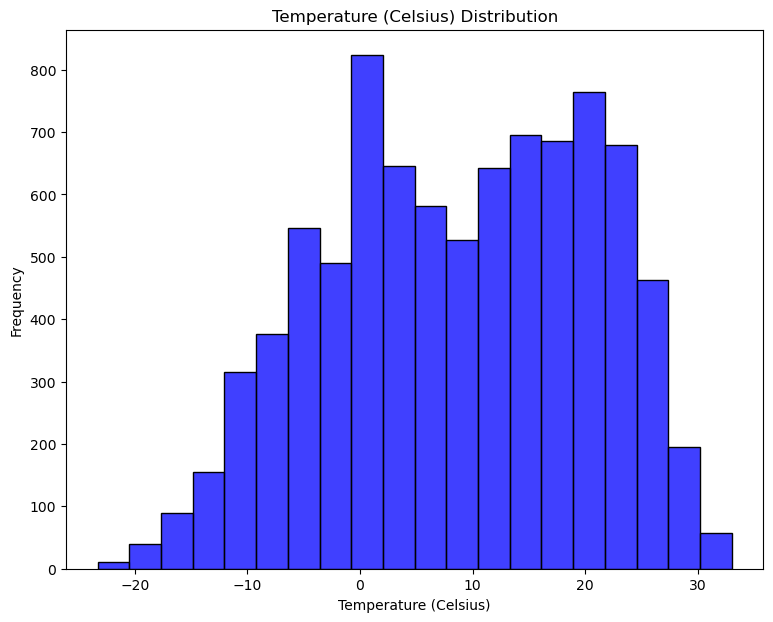

In [18]:
#Temperature Distribution
plt.figure(figsize=(9, 7))
sns.histplot(wdata['Temp_C'], bins=20, color='b')
plt.title('Temperature (Celsius) Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

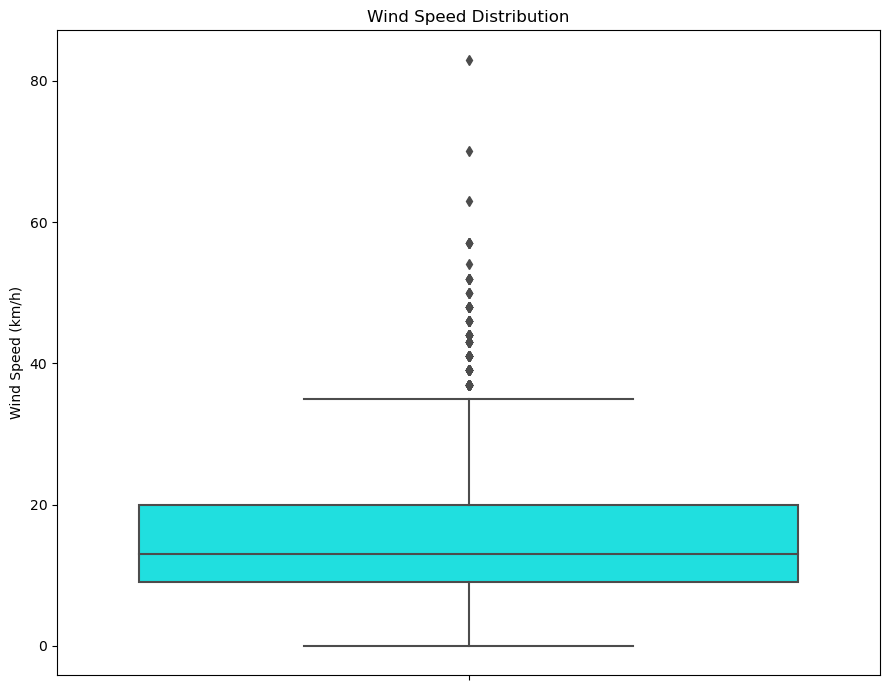

In [19]:
#Wind Speed Distribution
plt.figure(figsize=(9,7))
sns.boxplot(y=data['Wind Speed_km/h'], color='cyan')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

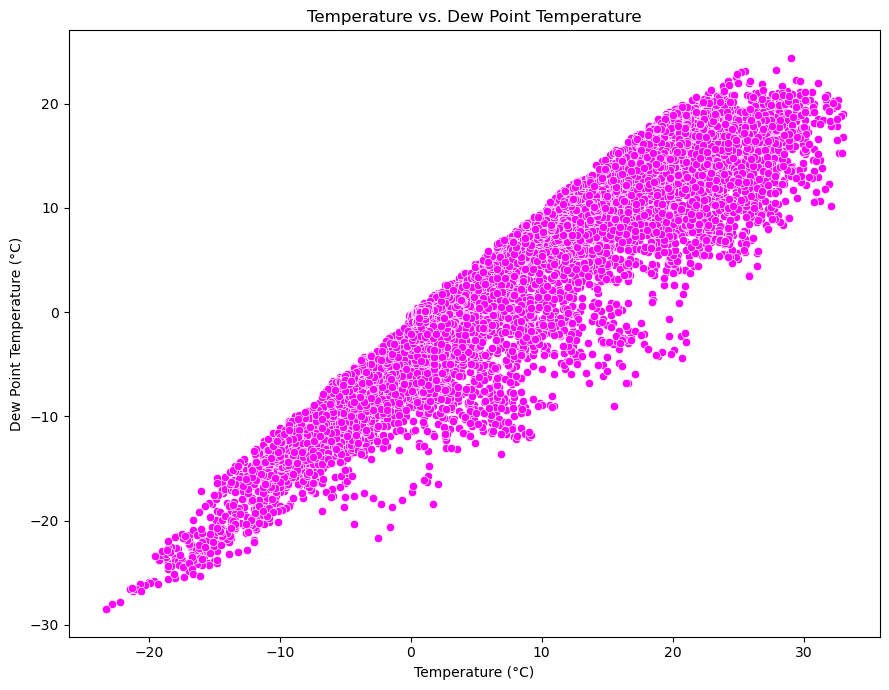

In [29]:
#Temperature vs Dew Point Temperature
plt.figure(figsize=(9, 7))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=data, color='magenta')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point Temperature (°C)')
plt.title('Temperature vs. Dew Point Temperature')
plt.tight_layout()
plt.show()

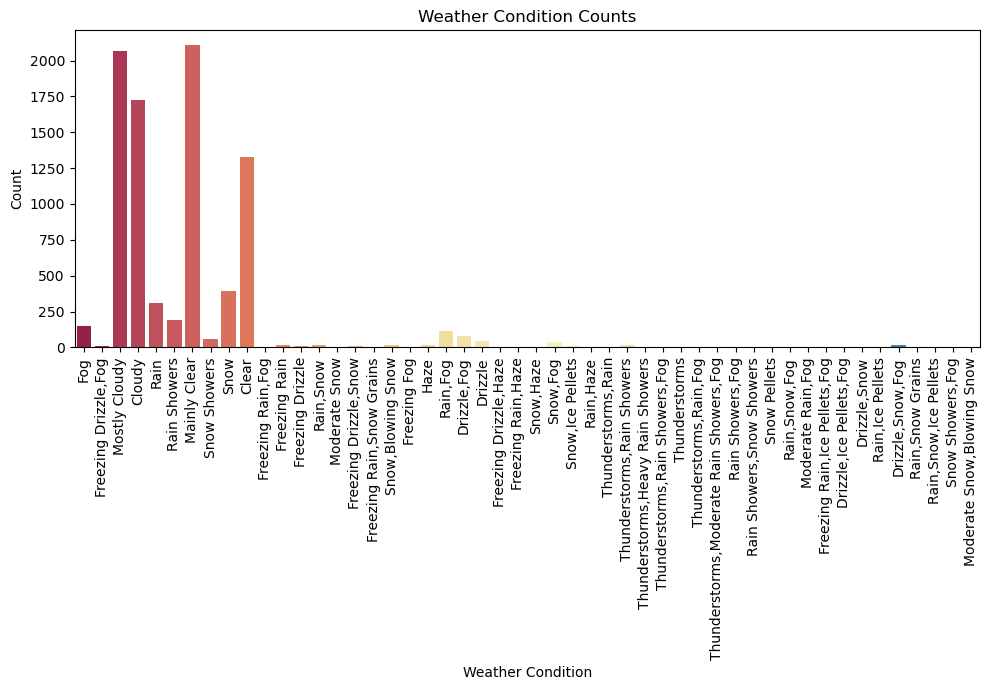

In [30]:
#Weather Categories
plt.figure(figsize=(10,7))
sns.countplot(x='weather condition', data=wdata, palette='Spectral')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Weather Condition Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

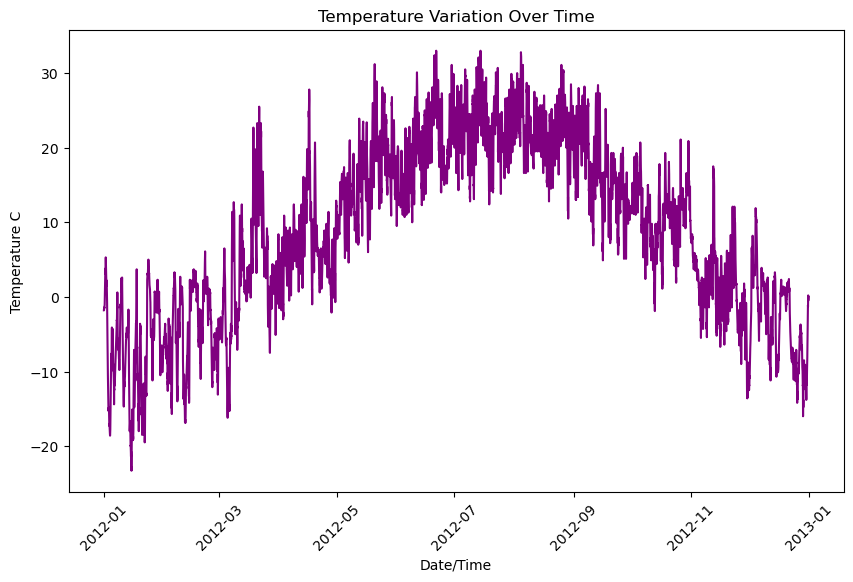

In [122]:
wdata['Date/Time'] = pd.to_datetime(wdata['Date/Time'])
plt.figure(figsize=(10,6))
sns.lineplot(x='Date/Time', y='Temp_C', data=wdata , color='purple')
plt.title('Temperature Variation Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature C')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis

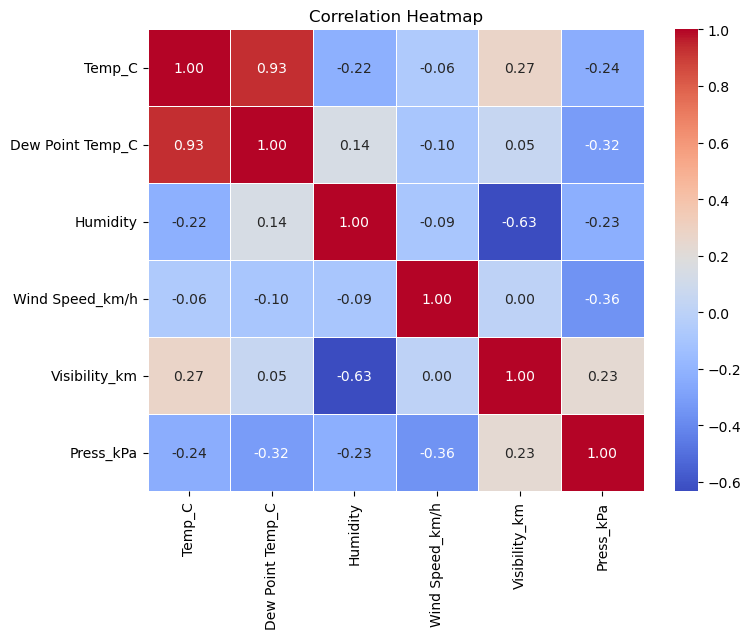

In [31]:
Numerical_Data = ['Temp_C', 'Dew Point Temp_C', 'Humidity', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
correlation_matrix = wdata[Numerical_Data].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

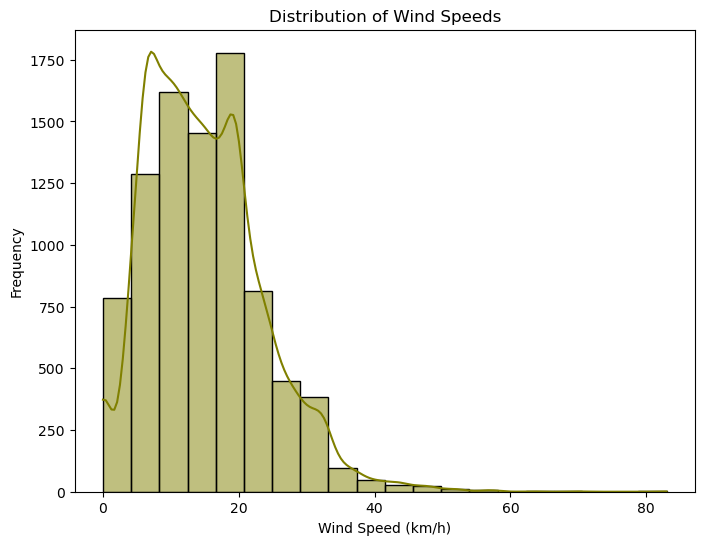

In [32]:
#wind speed Distribution
plt.figure(figsize=(8, 6))
sns.histplot(wdata['Wind Speed_km/h'], bins=20, color='olive', kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()


<b>Conclusion</b>

Weather data is a valuable resource that influences our daily lives and various industries. By understanding the types of weather data, its sources, and its applications, individuals and organizations can harness its power to make informed decisions, enhance safety, and optimize operations in a changing climate.